## Class 4-1 homework: Simple supervised learning

For this assignment you will use a decision tree to figure out which type of grape was used to make each wine, starting from an analysis of 13 different aspects of chemical composition. 

This is a classic machine learning test data set, originally from [here](https://archive.ics.uci.edu/ml/datasets/wine). I've edited it to remove a space in front of each column name, though!




In [1]:
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


## Part 1: Using a decision tree to figure out which wine is which

In [2]:
# Load in wine.csv and take a look at it. We will predict the variable "wine_cultivar" 
# This variable represents the type of grape: Shiraz, merlot, pinot, etc.

df = pd.read_csv('wine.csv')
df.head()

,wine_cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
df.shape

(178, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D5D4D30>,
      dtype=object)

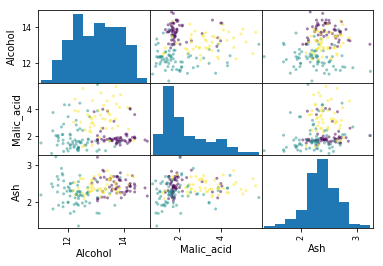

In [3]:
# First let's get an idea of the structure of this data.
# Use scatter_matrix to create a plot of the first few variables, using wine_cultivar as the color.
scatter_matrix(df[['Alcohol','Malic_acid','Ash']],c=df.wine_cultivar)

### Create test and training sets

In [9]:
# Split off a random fifth of this data to use for testing. How many rows examples are in each set?
train, test = train_test_split(df, test_size=0.25)

In [10]:
train.shape

(133, 14)

In [11]:
test.shape

(45, 14)

### Train a decision tree

In [12]:
df.dtypes

wine_cultivar                     int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280_OD315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [21]:
# Now create a list with the column names 
predict_col = 'wine_cultivar'


In [22]:
x_train = train.drop(predict_col, axis=1).values
y_train = train[[predict_col]].values

x_test = test.drop(predict_col, axis=1).values
y_test = test[[predict_col]].values

In [23]:
# Fit a decision tree to the training data

dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
# I WASN'T ABLE TO RUN GRAPHVIZ FOR SOME REASON. APPARENTLY IT'S A WINDOWS PROBLEM


# If you got graphviz to install correctly, draw a picture of the tree here
from sklearn.tree import export_graphviz
import graphviz

feature_names = df.columns.drop(predict_col)
export_graphviz(dt, 
                feature_names=feature_names, 
                rounded=True,
                out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [27]:
# How well does this tree do on the training data? 
# Compute the predicted wine_cultivar, and use this to print out the accuracy and confusion matrix
y_train_pred = dt.predict(x_train)
metrics.accuracy_score(y_train, y_train_pred)

1.0

### Evaluate the decision tree

In [28]:
# Predict wine_cultivar on the test data. What is the accuracy and confusion matrix on the test data?
y_test_pred = dt.predict(x_test)
metrics.accuracy_score(y_test, y_test_pred)

0.8666666666666667

## Part 2: Binary classification metrics
In this section we'll train a basic classifier on our favorite Titantic data, and then calculate some accuracy metrics for a binary predictor that we will be using over and over again in our upcoming discussion of algorithmic accountability.

Most of the code for this section is copied from the solution to Homework 3.2. This assignment is just to make sure you understand how to calculate the various accuracy metrics at the end.

For your reference, Wikipedia has an [amazing chart](https://en.wikipedia.org/wiki/Confusion_matrix) of the various things you can calculate from a binary confusion matrix.

In [30]:
# load titanic.csv once more
ti = pd.read_csv('titanic.csv')
ti.head()

,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,gender
0,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [31]:
# recode the pclass and gender variables so they are numeric
ti.pclass = ti.pclass.replace({'1st':1, '2nd':2, '3rd':3})
ti['female'] = ti.gender.replace({'male':0, 'female':1})

In [32]:
# Set aside a third of the data for testing.
# (Set random_state to some number to ensure we get the same split each time, 
# so everyone's answers will be the same and we can mark this easily.)
ti_train, ti_test = train_test_split(ti, test_size=0.3, random_state=42)

In [33]:
# Set up x and y variables and train a decision tree on the pclass and sex features, to predict survived
feature_columns = ['pclass','female']
ti_x = ti_train[feature_columns].values
ti_y = ti_train[['survived']].values

dt = tree.DecisionTreeClassifier()
dt.fit(ti_x,ti_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
# Create ti_test and ti_test values, and use the classifier to predict yti_test_pred
ti_x_test = ti_test[feature_columns].values
ti_y_test = ti_test[['survived']].values
ti_y_test_pred = dt.predict(ti_x_test)

In [35]:
# Print out the confusion matrix for the classifier. Use the DataFrame trick we saw in class to label the axes.
pd.DataFrame(metrics.confusion_matrix(ti_y_test, ti_y_test_pred), 
             columns=['Predicted 0','Predicted 1'],
             index=['True 0', 'True 1'])

,Predicted 0,Predicted 1
True 0,242,3
True 1,65,84


In [36]:
# Ok! What are the number of true positives, true negatives, false positives, and false negatives?
TP = 84
TN = 242
FP = 3
FN = 65

In [37]:
# Using only the varaibles TP,TN,FP,FN, calculate and print the overall accuracy
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy

0.8274111675126904

In [38]:
# Check that you have your calculation right by comparing to metrics.accuracy_score
metrics.accuracy_score(ti_y_test, ti_y_test_pred)

0.8274111675126904

In [39]:
# Using only the varaibles TP,TN,FP,FN, calculate and print the false positive rate and the false negative rate
FPR = FP/(FP+TN)
FPR

0.012244897959183673

In [40]:
FNR = FN/(FN+TP)
FNR

0.436241610738255

In [41]:
# Now compute and print the precision aka positive predictive value, again from these four variables.
precision = TP/(TP+FP)
precision

0.9655172413793104

Explain what precision means, in words that an average reader could understand. Also explain what this particular precision value means.


(Your answer here)

## Bonus: Logistic regression classifier on the wine data
Fit a logistic regression to the same wine data. How well does it do?

In [ ]:
# Fit a LogisticRegression model to the wine data (x_train, y_trin)


In [ ]:
# How well does logistic regression do on the training data? Print the accuracy and confusion matrix


In [ ]:
# How well does logistic regression do on the test data (x_test, y_test)? Print the accuracy and confusion matrix
